#Import library


In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

##1. Thu thập và mô tả dữ liệu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("./train.csv")

In [3]:
print(f"Số sample (dòng): {df.shape[0]}")
print(f"Số feature (cột): {df.shape[1]}")

Số sample (dòng): 1460
Số feature (cột): 81


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Tính toán các giá trị thống kê cho các column thuộc kiểu số (trừ cột Id)

df_no_id = df.drop('Id', axis=1)

numeric_cols = df_no_id.select_dtypes(include='number')

numeric_stats = numeric_cols.describe().T

print(numeric_stats)


                count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712  

In [7]:
object_cols = df.select_dtypes(include='object')

object_summary_list = []

for col in object_cols.columns:
    value_counts = df[col].value_counts(dropna=False)
    value_percents = (value_counts / len(df)) * 100

    for value, count in value_counts.items():
        object_summary_list.append({
            'Tên cột': col,
            'Giá trị': value,
            'Số lượng': count,
            'Tỷ lệ (%)': round(value_percents[value], 2)
        })

object_summary_df = pd.DataFrame(object_summary_list)

print(object_summary_df)


           Tên cột  Giá trị  Số lượng  Tỷ lệ (%)
0         MSZoning       RL      1151      78.84
1         MSZoning       RM       218      14.93
2         MSZoning       FV        65       4.45
3         MSZoning       RH        16       1.10
4         MSZoning  C (all)        10       0.68
..             ...      ...       ...        ...
262  SaleCondition  Partial       125       8.56
263  SaleCondition  Abnorml       101       6.92
264  SaleCondition   Family        20       1.37
265  SaleCondition   Alloca        12       0.82
266  SaleCondition  AdjLand         4       0.27

[267 rows x 4 columns]


#2. Trực quan hóa dữ liệu

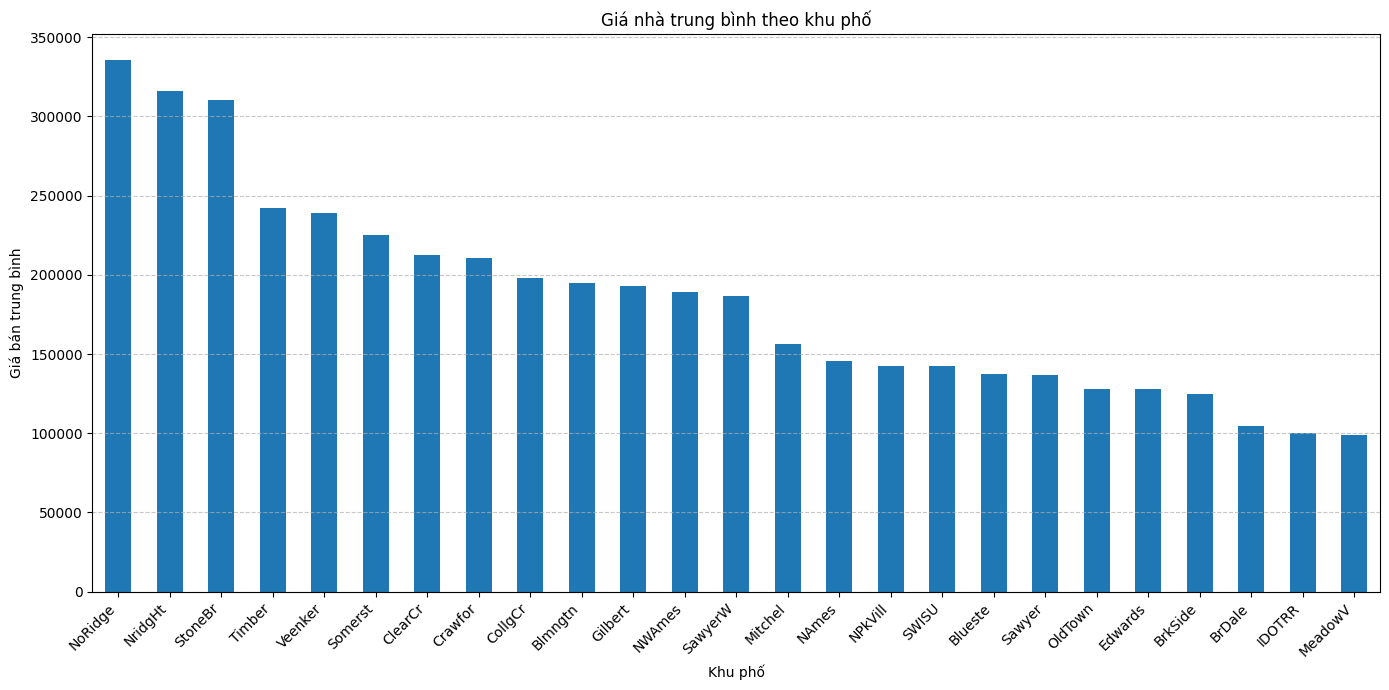

In [8]:
neighborhood_mapping = {
    0: "Bloomington Heights",
    1: "Bluestem",
    2: "Briardale",
    3: "Brookside",
    4: "Clear Creek",
    5: "College Creek",
    6: "Crawford",
    7: "Edwards",
    8: "Gilbert",
    9: "Iowa DOT and Rail Road",
    10: "Meadow Village",
    11: "Mitchell",
    12: "North Ames",
    13: "Northridge",
    14: "Northpark Villa",
    15: "Northridge Heights",
    16: "Northwest Ames",
    17: "Old Town",
    18: "South & West of Iowa State University",
    19: "Sawyer",
    20: "Sawyer West",
    21: "Somerset",
    22: "Stone Brook",
    23: "Timberland",
    24: "Veenker"
}

# 3. Tính giá trung bình theo khu phố
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].mean()

# 4. Thay tên viết tắt bằng tên đầy đủ
neighborhood_prices = neighborhood_prices.rename(index=neighborhood_mapping)

# 5. Sắp xếp giảm dần theo giá
neighborhood_prices = neighborhood_prices.sort_values(ascending=False)

# 6. Vẽ biểu đồ
plt.figure(figsize=(14, 7))
neighborhood_prices.plot(kind='bar')
plt.title('Giá nhà trung bình theo khu phố')
plt.xlabel('Khu phố')
plt.ylabel('Giá bán trung bình')
plt.xticks(rotation=45, ha='right')  # Xoay trục X 45 độ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

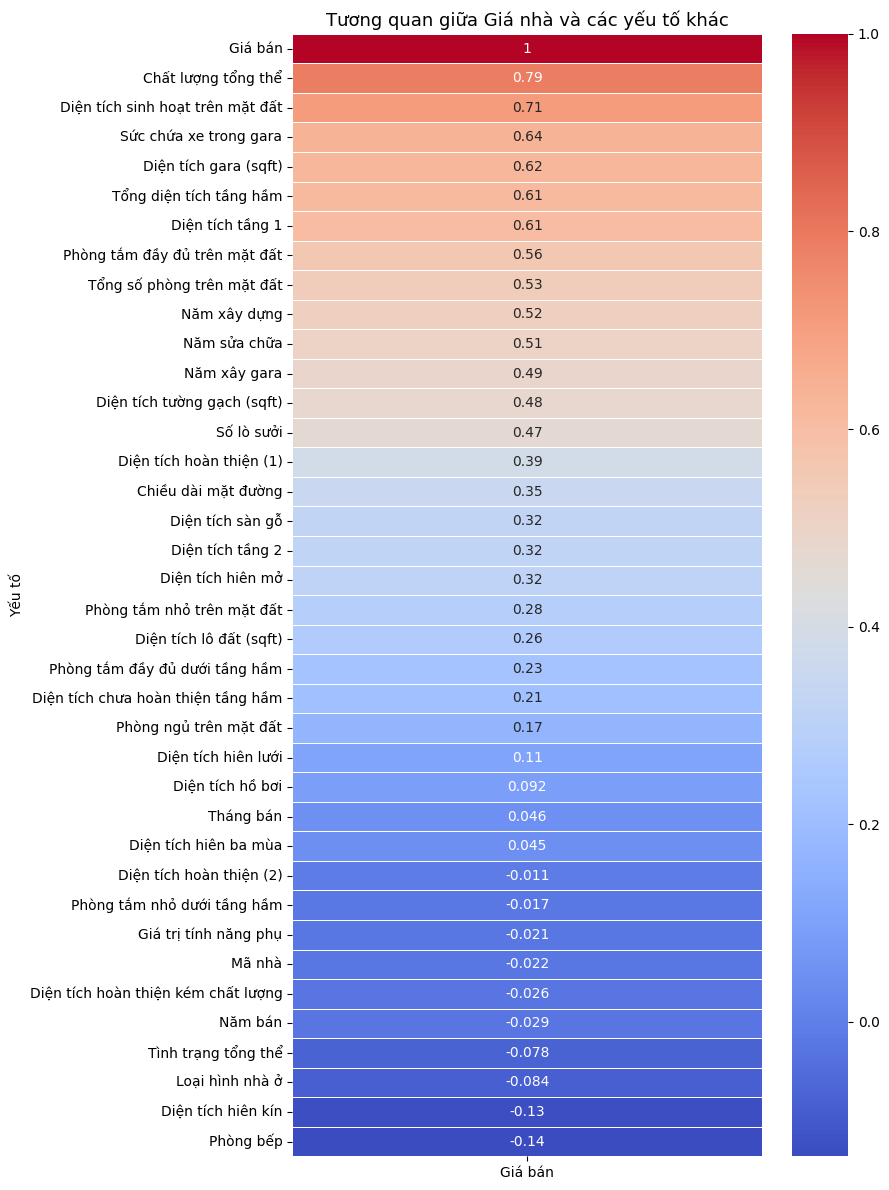

In [9]:
column_name_mapping = {
    "Id": "Mã nhà",
    "MSSubClass": "Loại hình nhà ở",
    "MSZoning": "Phân vùng quy hoạch",
    "LotFrontage": "Chiều dài mặt đường",
    "LotArea": "Diện tích lô đất (sqft)",
    "Street": "Loại đường tiếp cận",
    "Alley": "Lối hẻm tiếp cận",
    "LotShape": "Hình dạng lô đất",
    "LandContour": "Độ bằng phẳng đất",
    "Utilities": "Tiện ích có sẵn",
    "LotConfig": "Cấu hình lô đất",
    "LandSlope": "Độ dốc lô đất",
    "Neighborhood": "Khu phố",
    "Condition1": "Tình trạng xung quanh (1)",
    "Condition2": "Tình trạng xung quanh (2)",
    "BldgType": "Loại nhà",
    "HouseStyle": "Phong cách nhà",
    "OverallQual": "Chất lượng tổng thể",
    "OverallCond": "Tình trạng tổng thể",
    "YearBuilt": "Năm xây dựng",
    "YearRemodAdd": "Năm sửa chữa",
    "RoofStyle": "Kiểu mái",
    "RoofMatl": "Vật liệu mái",
    "Exterior1st": "Vật liệu ngoài (1)",
    "Exterior2nd": "Vật liệu ngoài (2)",
    "MasVnrType": "Loại tường gạch trang trí",
    "MasVnrArea": "Diện tích tường gạch (sqft)",
    "ExterQual": "Chất lượng bên ngoài",
    "ExterCond": "Tình trạng bên ngoài",
    "Foundation": "Móng nhà",
    "BsmtQual": "Chiều cao tầng hầm",
    "BsmtCond": "Tình trạng tầng hầm",
    "BsmtExposure": "Tầng hầm lộ thiên",
    "BsmtFinType1": "Loại tầng hầm hoàn thiện (1)",
    "BsmtFinSF1": "Diện tích hoàn thiện (1)",
    "BsmtFinType2": "Loại tầng hầm hoàn thiện (2)",
    "BsmtFinSF2": "Diện tích hoàn thiện (2)",
    "BsmtUnfSF": "Diện tích chưa hoàn thiện tầng hầm",
    "TotalBsmtSF": "Tổng diện tích tầng hầm",
    "Heating": "Hệ thống sưởi",
    "HeatingQC": "Chất lượng hệ thống sưởi",
    "CentralAir": "Điều hòa trung tâm",
    "Electrical": "Hệ thống điện",
    "1stFlrSF": "Diện tích tầng 1",
    "2ndFlrSF": "Diện tích tầng 2",
    "LowQualFinSF": "Diện tích hoàn thiện kém chất lượng",
    "GrLivArea": "Diện tích sinh hoạt trên mặt đất",
    "BsmtFullBath": "Phòng tắm đầy đủ dưới tầng hầm",
    "BsmtHalfBath": "Phòng tắm nhỏ dưới tầng hầm",
    "FullBath": "Phòng tắm đầy đủ trên mặt đất",
    "HalfBath": "Phòng tắm nhỏ trên mặt đất",
    "BedroomAbvGr": "Phòng ngủ trên mặt đất",
    "KitchenAbvGr": "Phòng bếp",
    "KitchenQual": "Chất lượng bếp",
    "TotRmsAbvGrd": "Tổng số phòng trên mặt đất",
    "Functional": "Chức năng nhà",
    "Fireplaces": "Số lò sưởi",
    "FireplaceQu": "Chất lượng lò sưởi",
    "GarageType": "Vị trí gara",
    "GarageYrBlt": "Năm xây gara",
    "GarageFinish": "Hoàn thiện bên trong gara",
    "GarageCars": "Sức chứa xe trong gara",
    "GarageArea": "Diện tích gara (sqft)",
    "GarageQual": "Chất lượng gara",
    "GarageCond": "Tình trạng gara",
    "PavedDrive": "Lối vào lát gạch",
    "WoodDeckSF": "Diện tích sàn gỗ",
    "OpenPorchSF": "Diện tích hiên mở",
    "EnclosedPorch": "Diện tích hiên kín",
    "3SsnPorch": "Diện tích hiên ba mùa",
    "ScreenPorch": "Diện tích hiên lưới",
    "PoolArea": "Diện tích hồ bơi",
    "PoolQC": "Chất lượng hồ bơi",
    "Fence": "Chất lượng hàng rào",
    "MiscFeature": "Tính năng phụ khác",
    "MiscVal": "Giá trị tính năng phụ",
    "MoSold": "Tháng bán",
    "YrSold": "Năm bán",
    "SaleType": "Loại hình bán",
    "SaleCondition": "Tình trạng bán",
    "SalePrice": "Giá bán"
}

df_heatmap = df.rename(columns=column_name_mapping)

numeric_df = df_heatmap.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

# Lấy tương quan với cột 'Giá bán' và sắp xếp
corr_with_price = correlation_matrix[['Giá bán']].sort_values(by='Giá bán', ascending=False)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(9, 12))
sns.heatmap(corr_with_price, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Tương quan giữa Giá nhà và các yếu tố khác', fontsize=13)
plt.ylabel('Yếu tố')
plt.tight_layout()
plt.show()

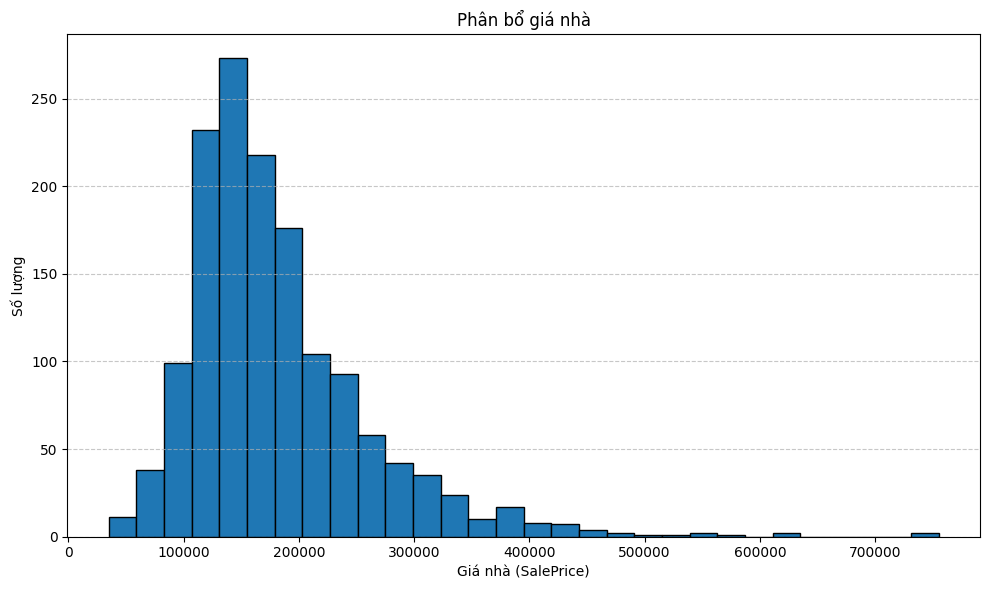

In [10]:
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ histogram cho phân bổ giá nhà
plt.hist(df['SalePrice'].dropna(), bins=30, edgecolor='black')
plt.title('Phân bổ giá nhà')
plt.xlabel('Giá nhà (SalePrice)')
plt.ylabel('Số lượng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
df_filtered = df[df['SalePrice'].notnull()].copy()

In [12]:
# Nhãn tiếng Việt cho chất lượng nhà
qual_labels_vi = {
    10: 'Rất Xuất Sắc',
    9: 'Xuất Sắc',
    8: 'Rất Tốt',
    7: 'Tốt',
    6: 'Khá',
    5: 'Trung Bình',
    4: 'Dưới Trung Bình',
    3: 'Yếu',
    2: 'Kém',
    1: 'Rất Kém'
}

# Gán nhãn tiếng Việt
df_filtered['NhãnChấtLượng'] = df_filtered['OverallQual'].map(qual_labels_vi)

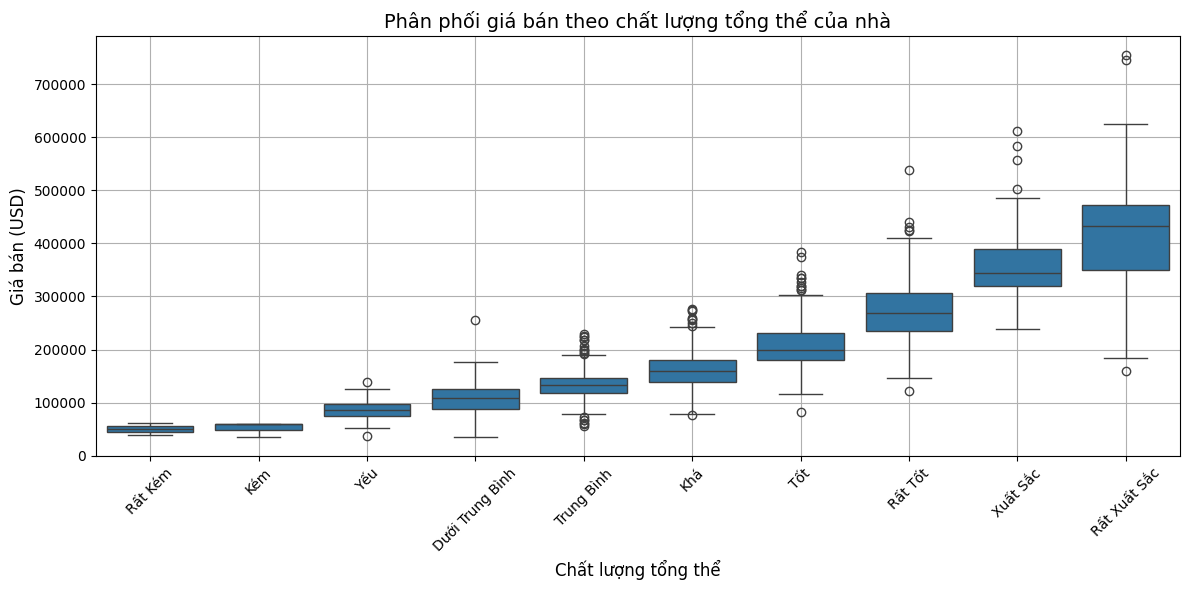

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='NhãnChấtLượng',
    y='SalePrice',
    data=df_filtered,
    order=[
        'Rất Kém', 'Kém', 'Yếu', 'Dưới Trung Bình', 'Trung Bình',
        'Khá', 'Tốt', 'Rất Tốt', 'Xuất Sắc', 'Rất Xuất Sắc'
    ]
)
plt.title('Phân phối giá bán theo chất lượng tổng thể của nhà', fontsize=14)
plt.xlabel('Chất lượng tổng thể', fontsize=12)
plt.ylabel('Giá bán (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


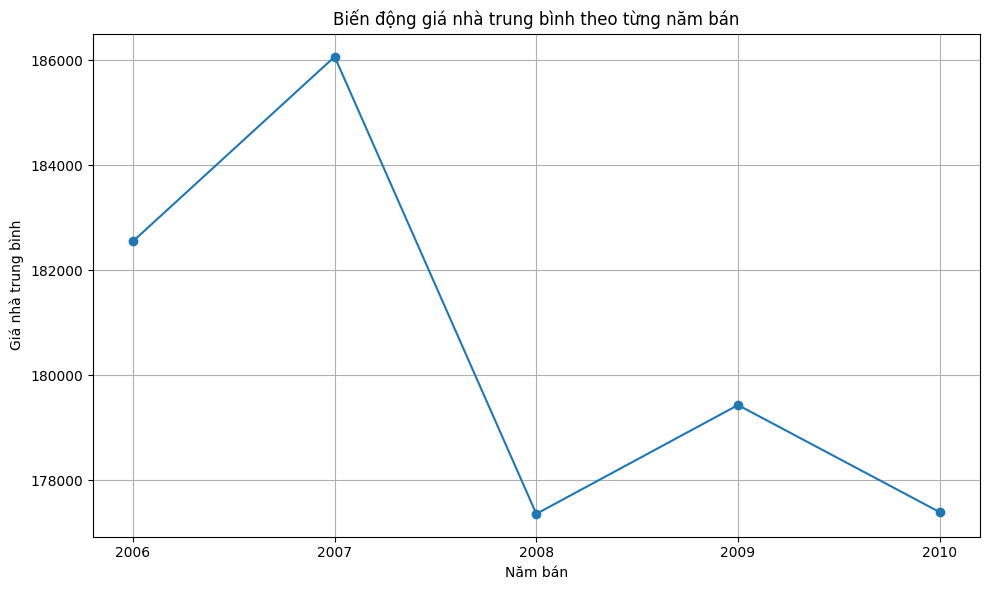

In [14]:
avg_price_per_year = df.groupby("YrSold")["SalePrice"].mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o')
plt.title("Biến động giá nhà trung bình theo từng năm bán")
plt.xlabel("Năm bán")
plt.ylabel("Giá nhà trung bình")
plt.grid(True)

# Format x-axis ticks as integers
plt.xticks(avg_price_per_year.index) # Set tick positions to the years
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.tight_layout()
plt.show()

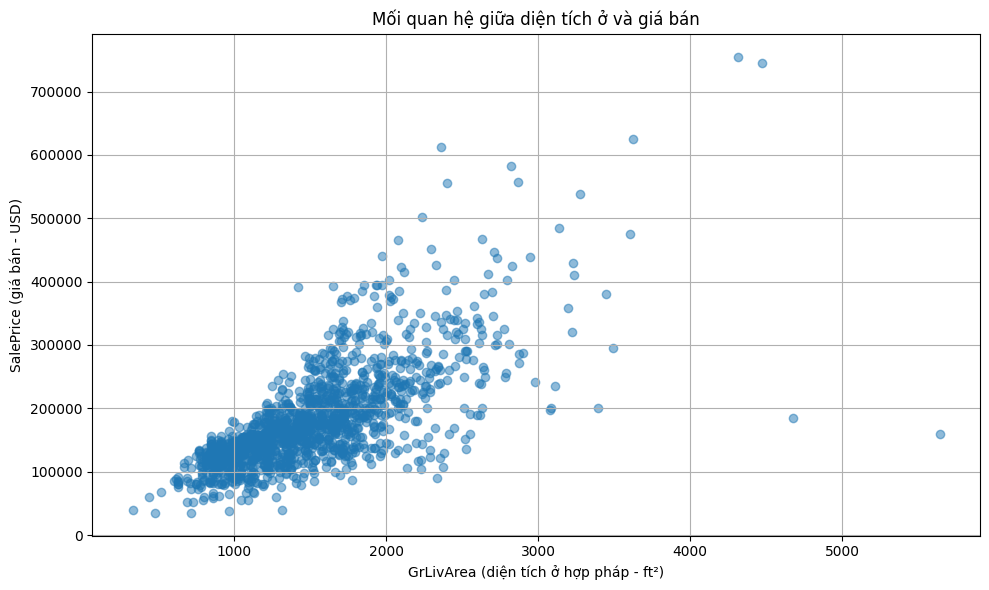

In [15]:
# Đếm tần suất từng giá bán
price_counts = df['SalePrice'].value_counts()

# Lọc ra các giá bán bị lặp lại quá nhiều (ví dụ >= 20 lần)
repeated_prices = price_counts[price_counts >= 20].index

# Tạo DataFrame mới không chứa các giá trùng nhiều
df_filtered = df[~df['SalePrice'].isin(repeated_prices)]

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['GrLivArea'], df_filtered['SalePrice'], alpha=0.5)
plt.title('Mối quan hệ giữa diện tích ở và giá bán')
plt.xlabel('GrLivArea (diện tích ở hợp pháp - ft²)')
plt.ylabel('SalePrice (giá bán - USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

#3. Tiền xử lý dữ liệu

##3.1 Xử lý các giá trị NaN/Null

In [16]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
null_columns = df.isna().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64




*   Nếu cột là số (int64, float64) thì dùng trung vị (median) để thay thế giá trị null.
*   Nếu là cột kiểu khác (object, category, v.v..) thì dùng giá trị xuất hiện nhiều nhất (mode)



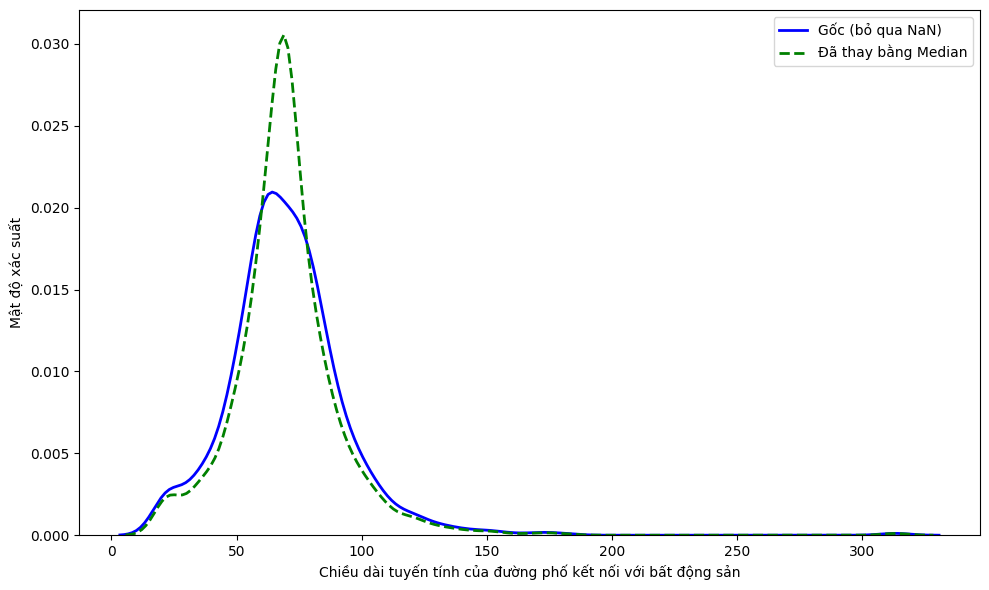

In [18]:
col = 'LotFrontage'

# Tạo dữ liệu gốc và dữ liệu sau khi thay NaN bằng median
original = df[col]  # dữ liệu có NaN
imputed = df[col].fillna(df[col].median())  # thay NaN bằng median

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Phân phối gốc (bỏ qua NaN)
sns.kdeplot(original.dropna(), color='blue', label='Gốc (bỏ qua NaN)', linewidth=2)

# Phân phối sau khi thay bằng median
sns.kdeplot(imputed, color='green', label='Đã thay bằng Median', linewidth=2, linestyle='--')

# Thêm chú thích
plt.xlabel("Chiều dài tuyến tính của đường phố kết nối với bất động sản")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            mean_value = df[column].median()
            df[column] = df[column].fillna(mean_value)
        else:
            mode_value = df[column].mode()
            if not mode_value.empty:
                df[column] = df[column].fillna(mode_value[0])
    return df

In [20]:
#Gọi hàm để xứ lý các giá trị còn thiếu
df = handle_missing_values(df)

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


##3.2 Label Encoder

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


##3.3 Bỏ cột Id

In [24]:
df = df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,2,2,2,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,2,2,2,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,2,2,2,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,2,2,2,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,2,2,2,0,12,2008,8,4,250000


##3.4. Chuẩn hóa dữ liệu

In [25]:
#Chia bộ dữ liệu thành các features và y
x = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [26]:
scaler = StandardScaler()

In [27]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,2,2,2,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,2,2,2,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,2,2,2,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,2,2,2,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,2,2,2,0,12,2008,8,4


In [28]:
x_scaler = scaler.fit_transform(x)
x_scaler_frame=pd.DataFrame(x_scaler,columns=x.columns)
x_scaler_frame.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,-0.045532,-0.220875,-0.207142,0.064238,-0.169981,0.750731,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.460320,-0.091886,0.064238,-0.169981,0.750731,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,-0.084636,0.073480,0.064238,-0.169981,-1.378933,0.314667,-0.02618,0.604670,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.447940,-0.096897,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-1.861302,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.641972,0.375148,0.064238,-0.169981,-1.378933,0.314667,-0.02618,-0.628316,...,-0.270208,-0.068692,0.049718,0.250362,0.039485,-0.087688,2.100892,0.138777,0.313867,0.208502


#5. Lựa chọn tham số

Separate features and target coloumns

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Áp dụng SelectKBest
k = 25  # số lượng đặc trưng bạn muốn chọn, có thể thay đổi
selector = SelectKBest(score_func=mutual_info_regression, k=25)
x_selected = selector.fit_transform(x_scaler, y)

# Sửa lại dòng lỗi:
selected_features = x.columns[selector.get_support()]
print("Các đặc trưng được chọn:", selected_features)


Các đặc trưng được chọn: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'OpenPorchSF'],
      dtype='object')


#6. Sử dụng mô hình học máy

Chia bộ test thành validation, test

In [30]:
# Chia tập huấn luyện (60%) và phần còn lại (40%)
x_train, x_temp, y_train, y_temp = train_test_split(
    x_selected, y, test_size=0.4, random_state=42
)

# Chia phần còn lại thành validation (20%) và test (20%)
x_val, x_test_final, y_val, y_test_final = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)



In [31]:
x_selected.shape,x_train.shape,x_val.shape, x_test_final.shape

((1460, 25), (876, 25), (292, 25), (292, 25))

In [32]:
y_train.shape,y_val.shape, y_test_final.shape

((876,), (292,), (292,))

In [33]:
#Định nghĩa hàm huần luyện
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

Triển khai mô hình

Linear Regression

In [34]:
# 1. Khởi tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(x_train, y_train)

# 2. Dự đoán
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test_final)
#lưu lại dự đoán
y_pred_linear = y_test_pred.copy()

# 3. Đánh giá
val_metrics = evaluate_model(y_val, y_val_pred)
# Use y_test_final and y_test_pred for test set evaluation
test_metrics = evaluate_model(y_test_final, y_test_pred)

# 4. Hiển thị kết quả
print("Kết quả trên tập VALIDATION:")
print(f"MAE:  {val_metrics[0]:.2f}")
print(f"MSE:  {val_metrics[1]:.2e}")
print(f"RMSE: {val_metrics[2]:.2f}")
print(f"R²:   {val_metrics[3]:.4f}")

print("\nKết quả trên tập TEST:")
print(f"MAE:  {test_metrics[0]:.2f}")
print(f"MSE:  {test_metrics[1]:.2e}")
print(f"RMSE: {test_metrics[2]:.2f}")
print(f"R²:   {test_metrics[3]:.4f}")

Kết quả trên tập VALIDATION:
MAE:  25360.92
MSE:  1.83e+09
RMSE: 42778.33
R²:   0.8057

Kết quả trên tập TEST:
MAE:  22602.88
MSE:  8.87e+08
RMSE: 29790.67
R²:   0.8185


Random Forest

In [35]:
seeds = [0, 10, 21, 42, 77]
results_val = []
results_test = [] # List to store test results

for seed in seeds:
    model = RandomForestRegressor(random_state=seed)
    model.fit(x_train, y_train)

    # Predict and evaluate on validation set
    y_val_pred = model.predict(x_val)
    metrics_val = evaluate_model(y_val, y_val_pred)
    results_val.append(metrics_val)

    # Predict and evaluate on test set
    y_test_pred = model.predict(x_test_final)
    metrics_test = evaluate_model(y_test_final, y_test_pred)
    results_test.append(metrics_test)

    # Lưu lại dự đoán ở seed = 42
    if seed == 42:
        y_pred_random = y_test_pred.copy()

results_val = np.array(results_val)
mean_val = results_val.mean(axis=0)
std_val = results_val.std(axis=0)

results_test = np.array(results_test) # Convert to numpy array
mean_test = results_test.mean(axis=0)
std_test = results_test.std(axis=0)


print("Kết quả trung bình trên tập Validation:")
print(f"MAE:  {mean_val[0]:.2f} ± {std_val[0]:.2f}")
print(f"MSE:  {mean_val[1]:.2e} ± {std_val[1]:.2e}")
print(f"RMSE: {mean_val[2]:.2f} ± {std_val[2]:.2f}")
print(f"R²:   {mean_val[3]:.4f} ± {std_val[3]:.4f}")


Kết quả trung bình trên tập Validation:
MAE:  20380.44 ± 123.31
MSE:  1.15e+09 ± 1.86e+07
RMSE: 33869.17 ± 275.47
R²:   0.8782 ± 0.0020


In [36]:
print("\nKết quả trung bình trên tập Test:") # Print test results
print(f"MAE:  {mean_test[0]:.2f} ± {std_test[0]:.2f}")
print(f"MSE:  {mean_test[1]:.2e} ± {std_test[1]:.2e}")
print(f"RMSE: {mean_test[2]:.2f} ± {std_test[2]:.2f}")
print(f"R²:   {mean_test[3]:.4f} ± {std_test[3]:.4f}")


Kết quả trung bình trên tập Test:
MAE:  16542.33 ± 131.36
MSE:  5.39e+08 ± 8.86e+06
RMSE: 23220.45 ± 190.44
R²:   0.8897 ± 0.0018


Polynomial Linear Regression

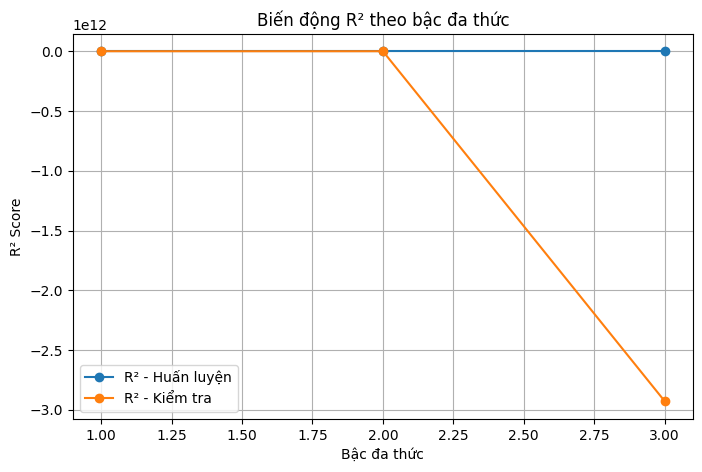

In [37]:
# Danh sách các bậc đa thức muốn kiểm tra
degrees = range(1, 4)

# Lưu kết quả
r2_train_scores = []
r2_test_scores = []

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(x_train, y_train)

    # Dự đoán
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test_final)  # Use x_test_final

    # Tính R²
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test_final, y_test_pred) # Use y_test_final

    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.plot(degrees, r2_train_scores, label='R² - Huấn luyện', marker='o')
plt.plot(degrees, r2_test_scores, label='R² - Kiểm tra', marker='o')
plt.xlabel('Bậc đa thức')
plt.ylabel('R² Score')
plt.title('Biến động R² theo bậc đa thức')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# 1. Khởi tạo mô hình đa thức với bậc hệ số bằng 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# 2. Huấn luyện trên tập train
poly_model.fit(x_train, y_train)

# 3. Dự đoán trên tập validation và test
y_val_pred_poly = poly_model.predict(x_val)
y_test_pred_poly = poly_model.predict(x_test_final)
#Lưu lại kết quả dự đoán
y_pred_poly = y_test_pred_poly.copy()

# 4. Đánh giá kết quả
val_metrics_poly = evaluate_model(y_val, y_val_pred_poly)
test_metrics_poly = evaluate_model(y_test_final, y_test_pred_poly)

# 5. In kết quả
print("Kết quả trên tập VALIDATION (Polynomial Regression):")
print(f"MAE:  {val_metrics_poly[0]:.2f}")
print(f"MSE:  {val_metrics_poly[1]:.2e}")
print(f"RMSE: {val_metrics_poly[2]:.2f}")
print(f"R²:   {val_metrics_poly[3]:.4f}")

print("\nKết quả trên tập TEST (Polynomial Regression):")
print(f"MAE:  {test_metrics_poly[0]:.2f}")
print(f"MSE:  {test_metrics_poly[1]:.2e}")
print(f"RMSE: {test_metrics_poly[2]:.2f}")
print(f"R²:   {test_metrics_poly[3]:.4f}")

Kết quả trên tập VALIDATION (Polynomial Regression):
MAE:  30025.06
MSE:  2.13e+09
RMSE: 46121.10
R²:   0.7741

Kết quả trên tập TEST (Polynomial Regression):
MAE:  21848.72
MSE:  1.01e+09
RMSE: 31749.81
R²:   0.7939


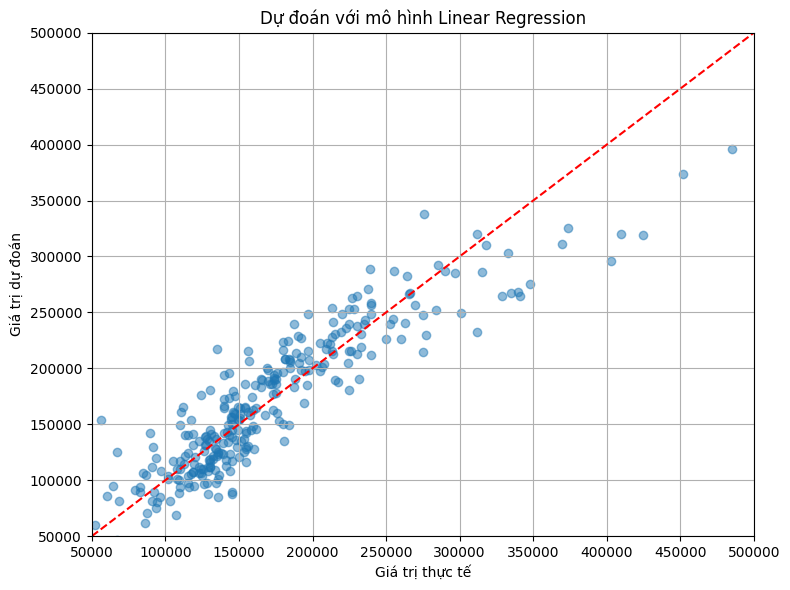

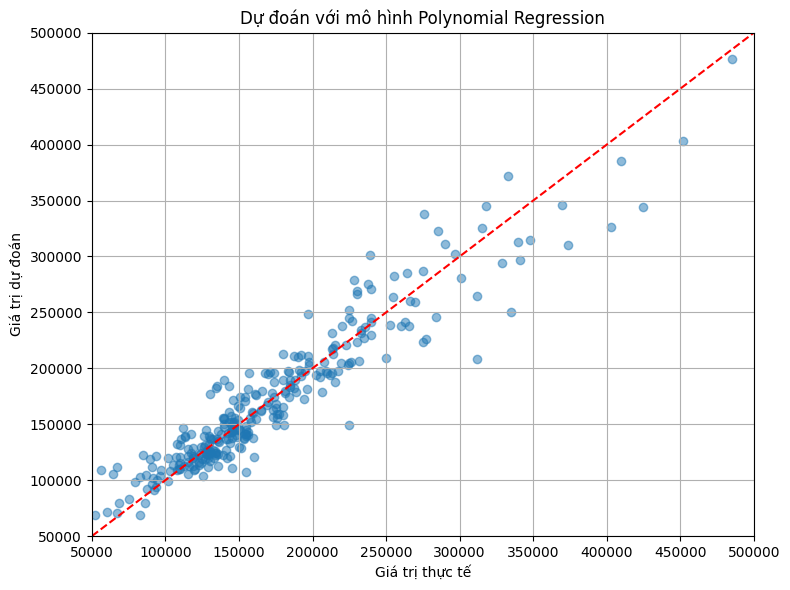

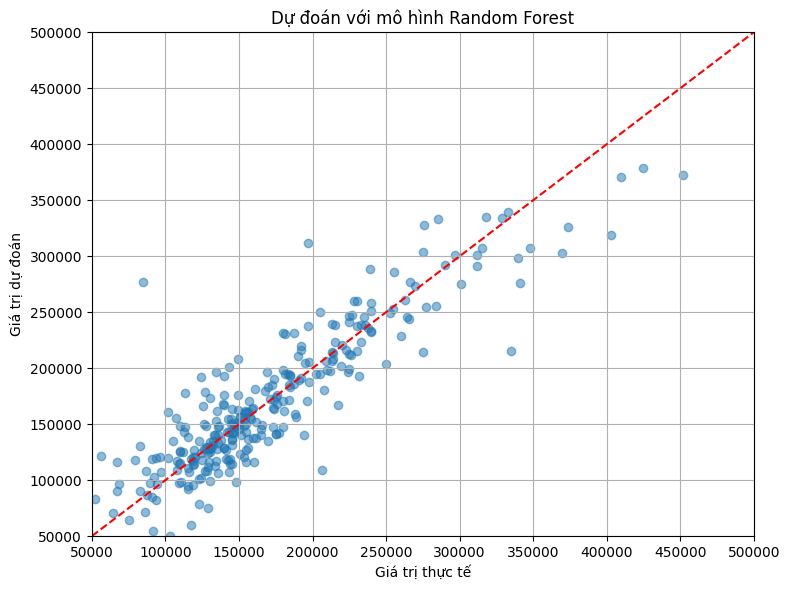

In [39]:
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest']
# Use y_test_pred for the Random Forest predictions on the test set
preds = [y_pred_linear, y_pred_random, y_pred_poly]

for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_final, preds[i], alpha=0.5)
    plt.plot([50000, 500000], [50000, 500000], 'r--')  # đường chéo y = x
    plt.xlim([50000, 500000])
    plt.ylim([50000, 500000])
    plt.xlabel("Giá trị thực tế")
    plt.ylabel("Giá trị dự đoán")
    plt.title(f"Dự đoán với mô hình {models[i]}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()